In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import Preprocessing as pp
import glob
import Helpers

path_data = '/Users/marvinwoller/Desktop/SmartDataAnalytics/Blatt2/data/'

rootdir_train = path_data + 'train/'
rootdir_test = path_data + 'test/'

train_labels_path = path_data + 'train_label.csv'
test_labels_path = path_data + 'test_label.csv'

train_labels = pd.read_csv(train_labels_path)
test_labels = pd.read_csv(test_labels_path)

files = glob.glob(rootdir_train + '**/*.csv')
files_test = glob.glob(rootdir_test + '**/*.csv')

In [11]:
df = pd.read_csv(path_data + 'features/median.csv', index_col=0, dtype={'area': str})

print(df.columns)
areas = ['004','006','011','015','017','018','020','029','037','046','049','052','057','057','060','064','080']
df_area = df[df['area'] == '064']

df_preprocessed = pp.basic_preprocessing(df.drop(['area','label'], axis = 1))
df_preprocessed = df_preprocessed.join(df['area'])
df_preprocessed = df_preprocessed.join(df['label'])


Index(['area', 'Wheel speed', 'hub angle', 'blade 1 angle', 'blade 2 angle',
       'blade 3 angle', 'pitch motor 1 current', 'pitch motor 2 current',
       'Pitch motor 3 current', 'overspeed sensor speed detection value',
       '5 second yaw against wind average', 'x direction vibration value',
       'y direction vibration value', 'hydraulic brake pressure',
       'Aircraft weather station wind speed', 'wind direction absolute value',
       'atmospheric pressure', 'reactive power control status',
       'inverter grid side current', 'inverter grid side voltage',
       'Inverter grid side active power', 'inverter grid side reactive power',
       'inverter generator side power', 'generator operating frequency',
       'generator current', 'generator torque', 'Inverter inlet temperature',
       'inverter outlet temperature', 'inverter inlet pressure',
       'inverter outlet pressure', 'generator power limit value',
       'reactive power set value', 'Rated hub speed',
       'w

/Users/marvinwoller/Desktop/SmartDataAnalytics_Gruppe1/Übungsblatt2/Preprocessing.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_local[df_local.columns] = scaler.fit_transform(df_local[df_local.columns])
/Users/marvinwoller/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/marvinwoller/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

# Daten Exploration
## Einfluss der einzelnen Variablen


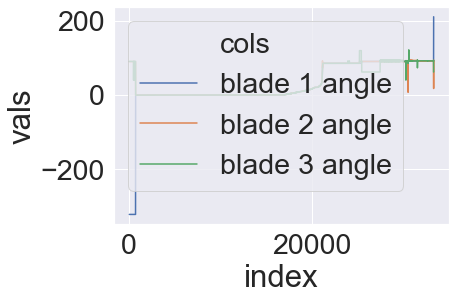

UsageError: Line magic function `%##` not found.


In [23]:
# -------------- Line Plots ----------------
aim_val = 'blade 1 angle'
df_sorted = df.sort_values(by=[aim_val],inplace=False).reset_index().drop(['index'], axis = 1).reset_index()
df_sorted.head()
#df_sorted_label0 = df_sorted[df_sorted['label'] == 0]
#df_sorted_label1 = df_sorted[df_sorted['label'] == 1]
#sns.lineplot(data = df_sorted_label0, x='index', y=aim_val, hue='label')
#sns.lineplot(data = df_sorted_label1, x='index', y=aim_val)

# Feature blade 1,2,3 angel:
aim_val = 'blade 1 angle'
df_sorted = df.sort_values(by=[aim_val],inplace=False).reset_index().drop(['index'], axis = 1).reset_index()
df_selected = df_sorted[['index', 'blade 1 angle', 'blade 2 angle', 'blade 3 angle']]
df_selected = df_selected.melt('index', var_name='cols', value_name='vals')
sns.lineplot(data = df_selected, x='index', y='vals', hue='cols')
plt.show()
%## md
# Wie man an diesem Plot sehen kann, sind die Werte der 3 Blattwinkel weitestgehend synchron. Wir werden daher die features blade 1 angel, blade 2 angle und blade 3 angle zu einem fearture 'blade angle' zusammenfassen.


Im folgenden untersuchen wir die Korrelationen von Variablen bei denen anhand der Bezeichnung ein vermeintlicher Zusammenhang bestehen könnte. Sollten stark korrelierte Variablen gefunden werden, so bietet es sich später beim preprocessing der Daten an diese Variablen zu entfernen bzw. diese zu einer neuen Variable zusammenzuführen, um einerseits das Problem einer möglichen Multikollinearität zu vermeiden, aber auch um den Datensatz in ein handlichereres Format zu bringen.

In [12]:
# ------------------ Correlation between variables ----------------
#Correlation Matrix helper function
def plot_correlation_matrix(df_local):
    plt.figure(figsize=(10,10))
    correlation_mat = df_local.corr(method='pearson')
    sns.set(font_scale=2.6)
    sns.heatmap(correlation_mat, annot = False)
    plt.show()

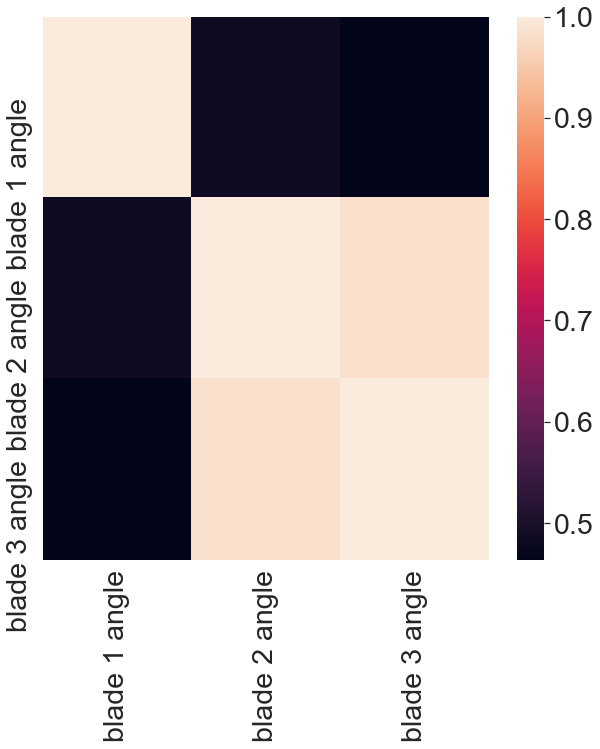

In [24]:
# Feature 'blade 1,2,3 angel':
df_selected = df[['blade 1 angle', 'blade 2 angle', 'blade 3 angle']]
plot_correlation_matrix(df_selected)

Diese Korrelationsmatrix zeigt uns, dass ein starker Zusammenhang zwischen den Variablen blade 2 angle und blade 3 angle besteht.

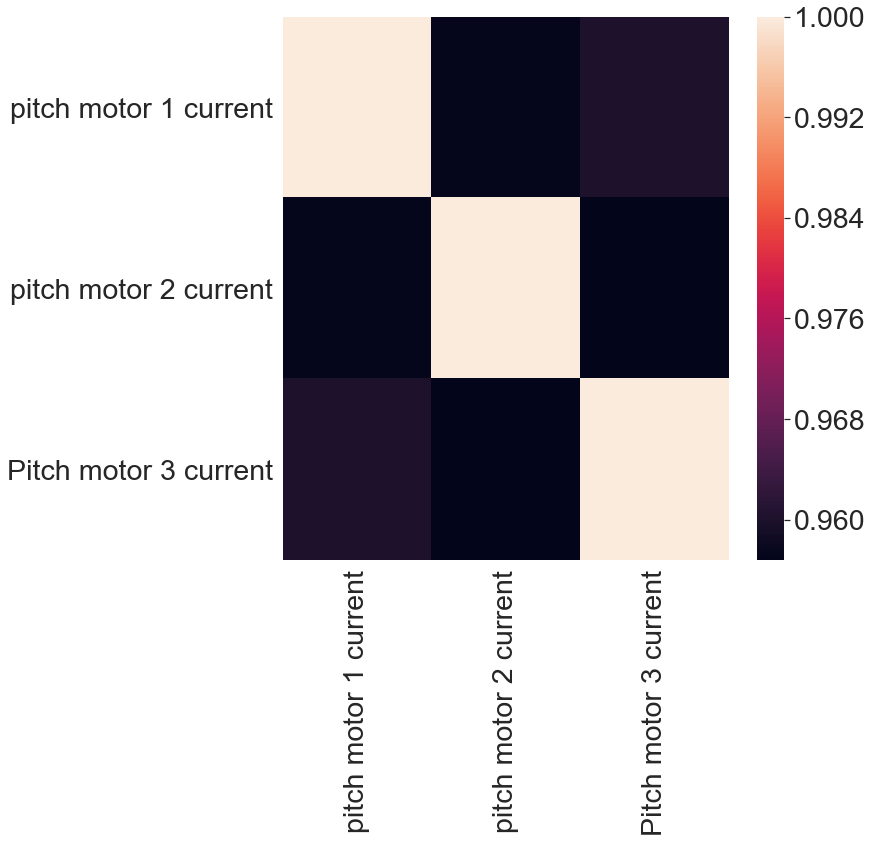

In [26]:
# Feature 'pitch motor 1,2,3 current':
df_selected = df[['pitch motor 1 current', 'pitch motor 2 current','Pitch motor 3 current']]
plot_correlation_matrix(df_selected)

Anhand dieser Korrelations Matrix lässt sich erkennen, dass die Variablen 'pitch motor 1 current', 'pitch motor 2 current' und 'Pitch motor 3 current' stark miteinander korreliert sind. Wir werden daher nur eine dieser Variablen im Datensatz behalten (pitch motor 1 current) und die anderen entfernen.

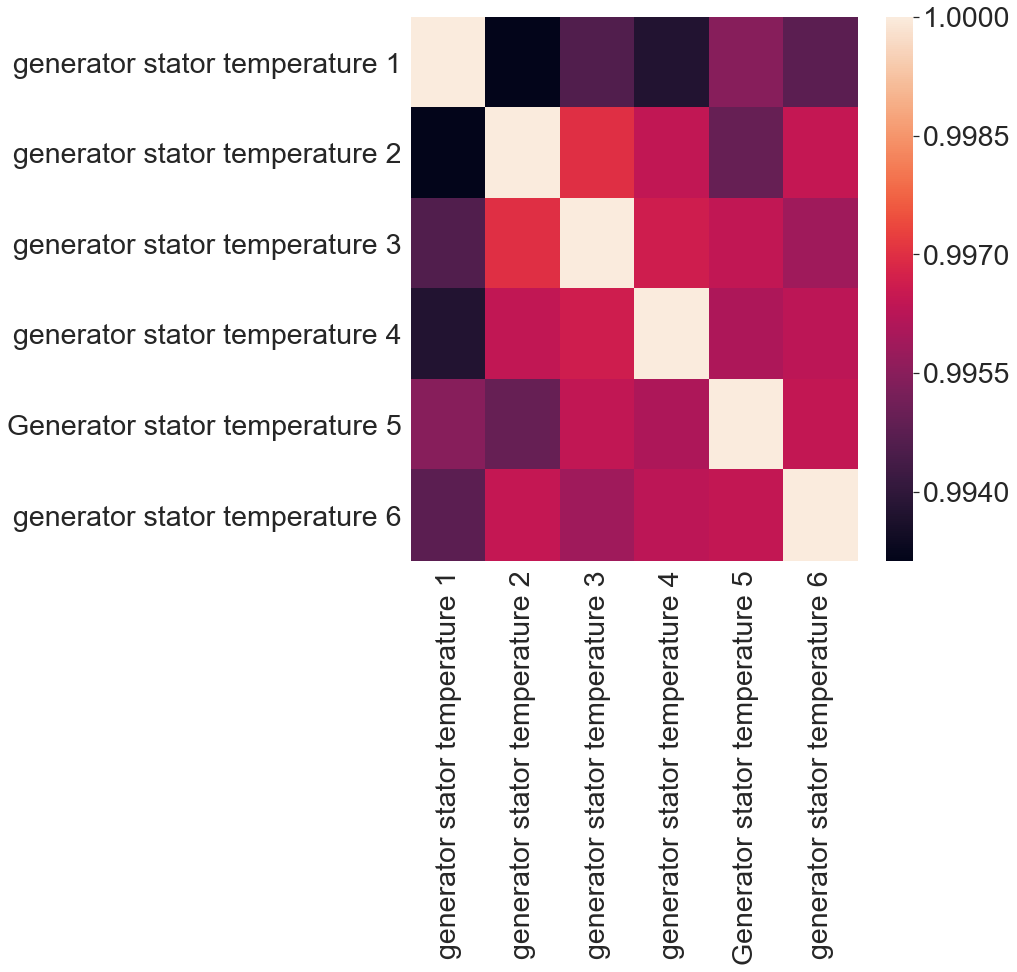

In [27]:
# Feature 'generator stator temperature 1':
df_selected = df[['generator stator temperature 1', 'generator stator temperature 2', 'generator stator temperature 3',
                  'generator stator temperature 4', 'Generator stator temperature 5', 'generator stator temperature 6']]
plot_correlation_matrix(df_selected)

Die Variablen 'generator strator temperature 1-6' sind stark miteinander korreliert. Möglicherweise handelt es sich hierbei um redundante Sensoren, welhalb wir von diesen Variablen lediglich eine im Datensatz behalten (bzw. zu einer neuen zusammenführen).

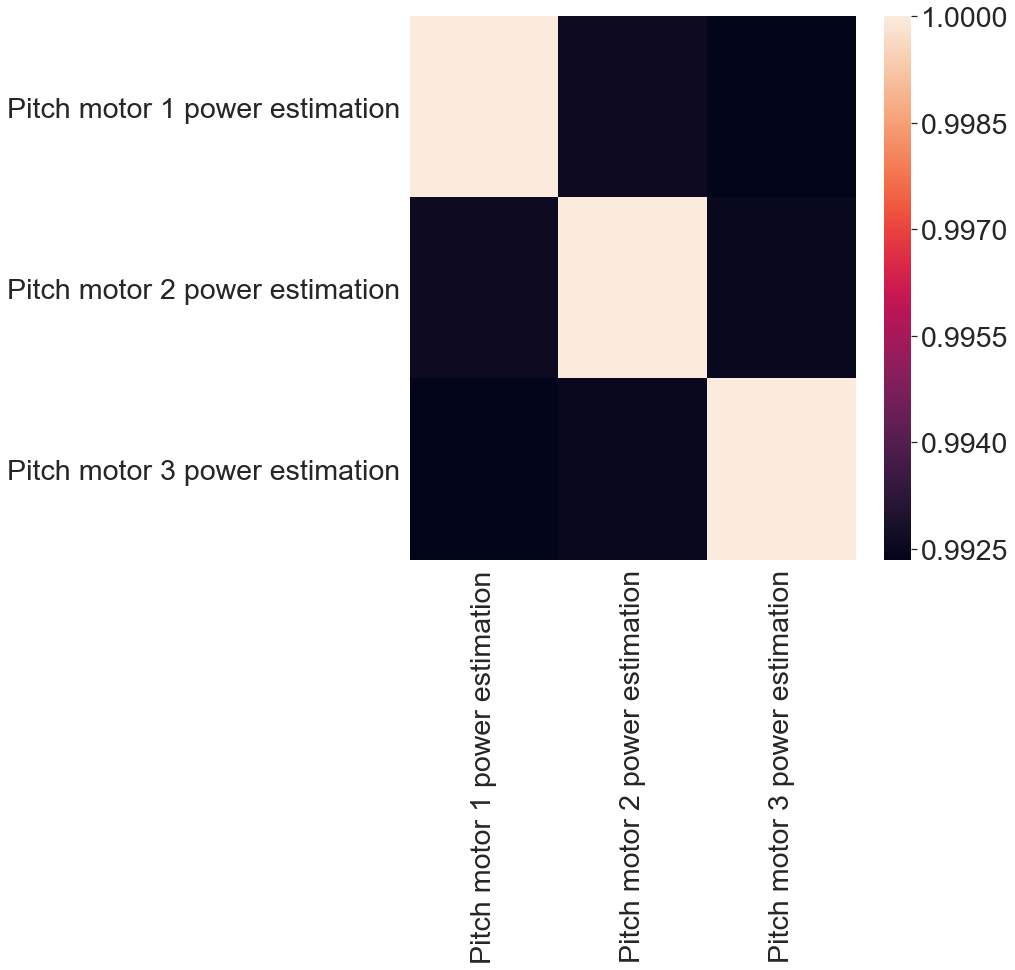

In [28]:
# Feature 'Pitch motor 1,2,3 power estimation':
df_selected = df[['Pitch motor 1 power estimation', 'Pitch motor 2 power estimation','Pitch motor 3 power estimation']]
plot_correlation_matrix(df_selected)

Auch die Variablen 'Pitch motor 1 power estimation', 'Pitch motor 2 power estimation','Pitch motor 3 power estimation' sind stark korreliert, weshalb es sich empfiehlt diese Variablen auf eine zu reduzieren.

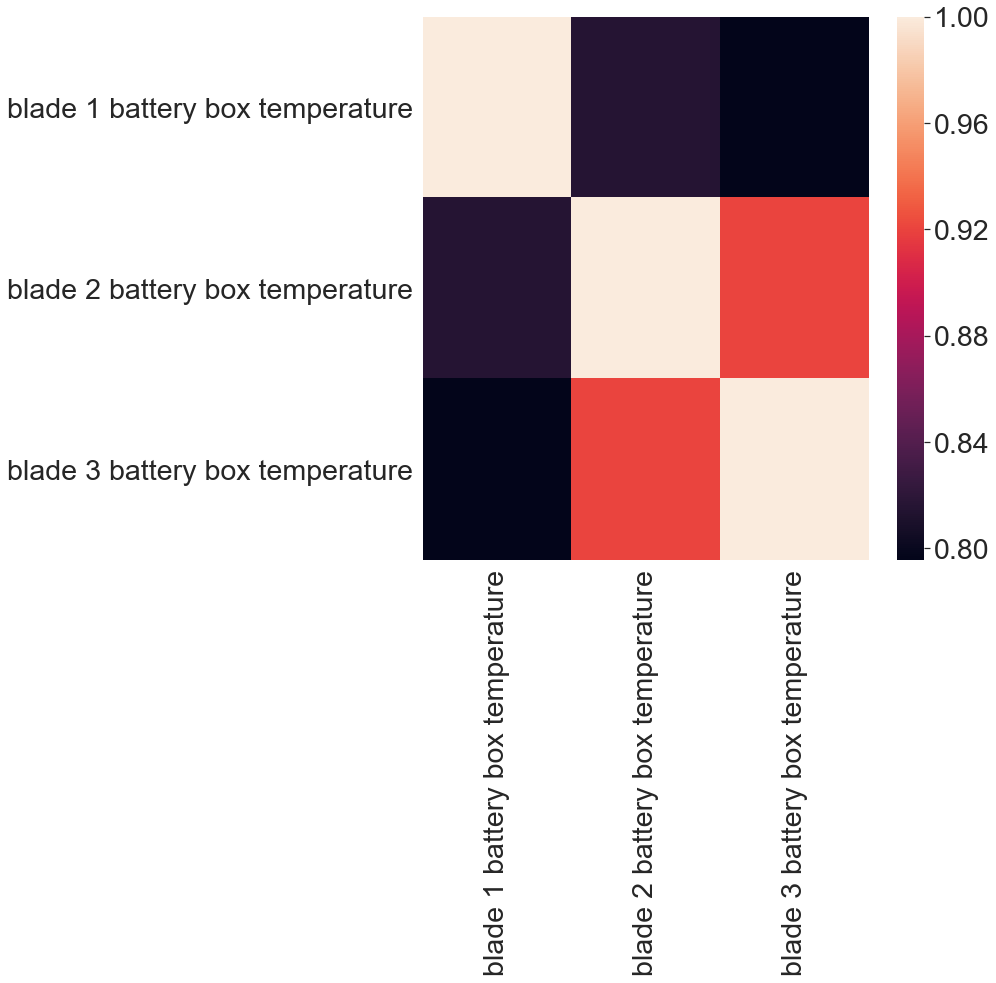

In [29]:
# Feature 'blade 1,2,3 battery box temperature':
df_selected = df[['blade 1 battery box temperature', 'blade 2 battery box temperature','blade 3 battery box temperature']]
plot_correlation_matrix(df_selected)

Die Korrelation zwischen den Variablen 'blade 2 battery box temperature' und 'blade 3 battery box temperature' ist stark, weshalb dieses zusammengeführt werden können. Die Variable 'blade 1 battery box temperature' sollte im Datensatz verbleiben.

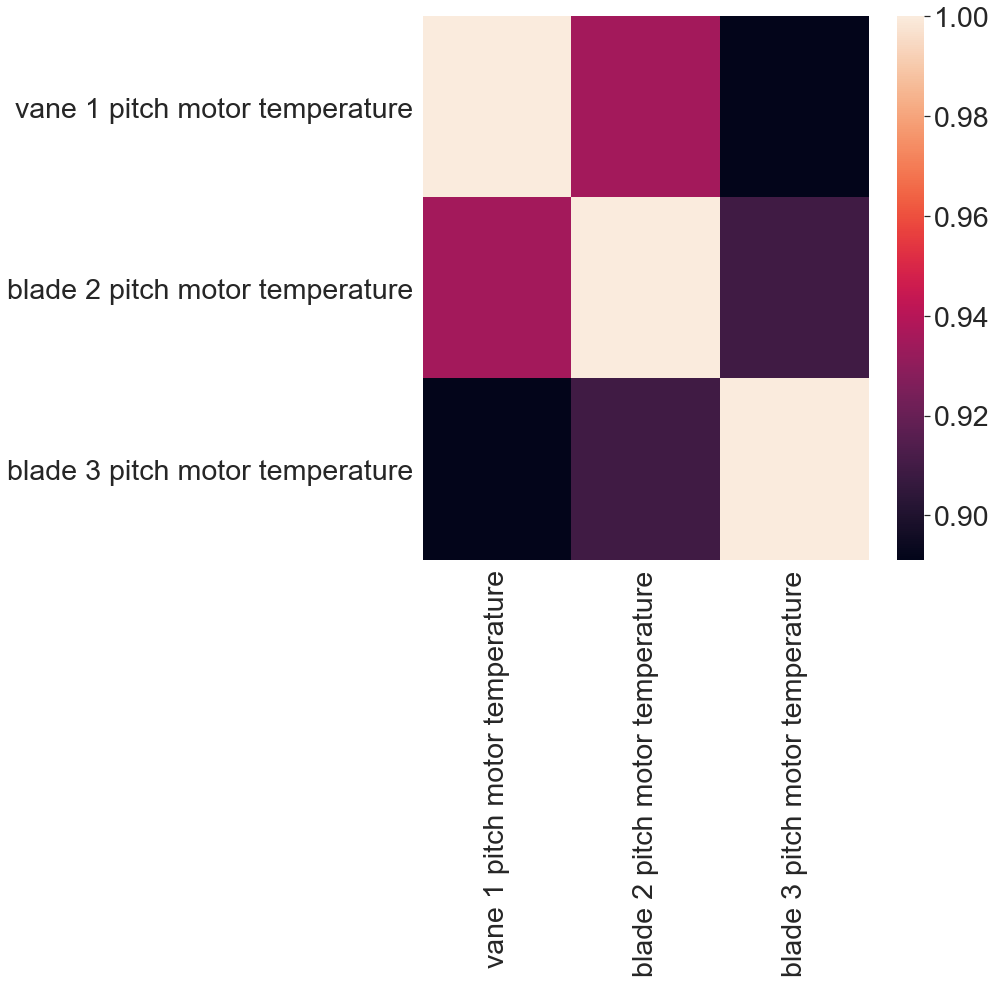

In [30]:
# Feature 'vane 1 pitch motor temperature', 'blade 2 pitch motor temperature', 'blade 3 pitch motor temperature':
df_selected = df[['vane 1 pitch motor temperature', 'blade 2 pitch motor temperature', 'blade 3 pitch motor temperature']]
plot_correlation_matrix(df_selected)

Hier bietet es sich an 'vane 1 pitch motor temperature' als Variable beizubehalten und 'blade 2 pitch motor temperature', 'blade 3 pitch motor temperature' zu kombinieren.

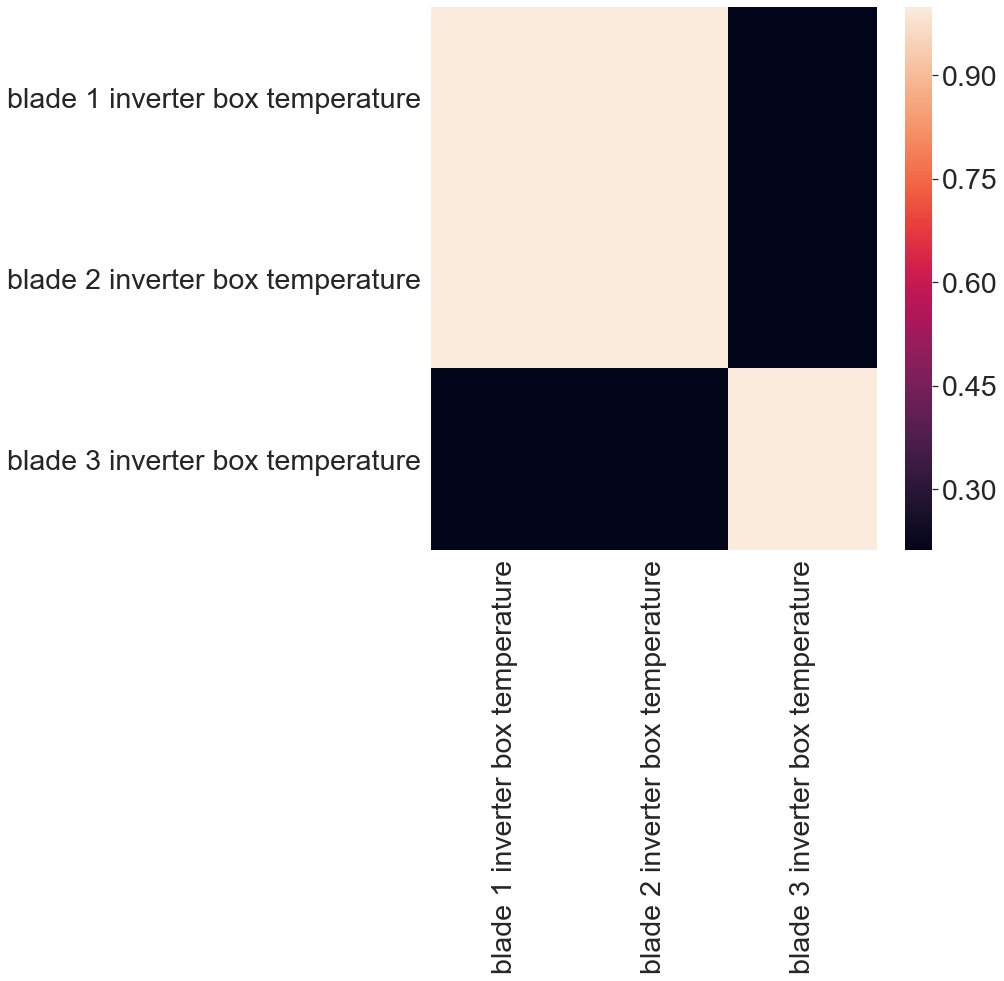

In [31]:
# Feature 'blade 1,2,3 inverter box temperature':
df_selected = df[['blade 1 inverter box temperature', 'blade 2 inverter box temperature', 'blade 3 inverter box temperature']]
plot_correlation_matrix(df_selected)

Die Variablen 'blade 1 inverter box temperature' und 'blade 2 inverter box temperature' sind stark miteinander korreliert, sodass eine der Variablen entfernt werden kann. 'blade 3 inverter box temperature' sollte beibehalten werden, da hier keine Korrelation mit den anderen beiden vorliegt.

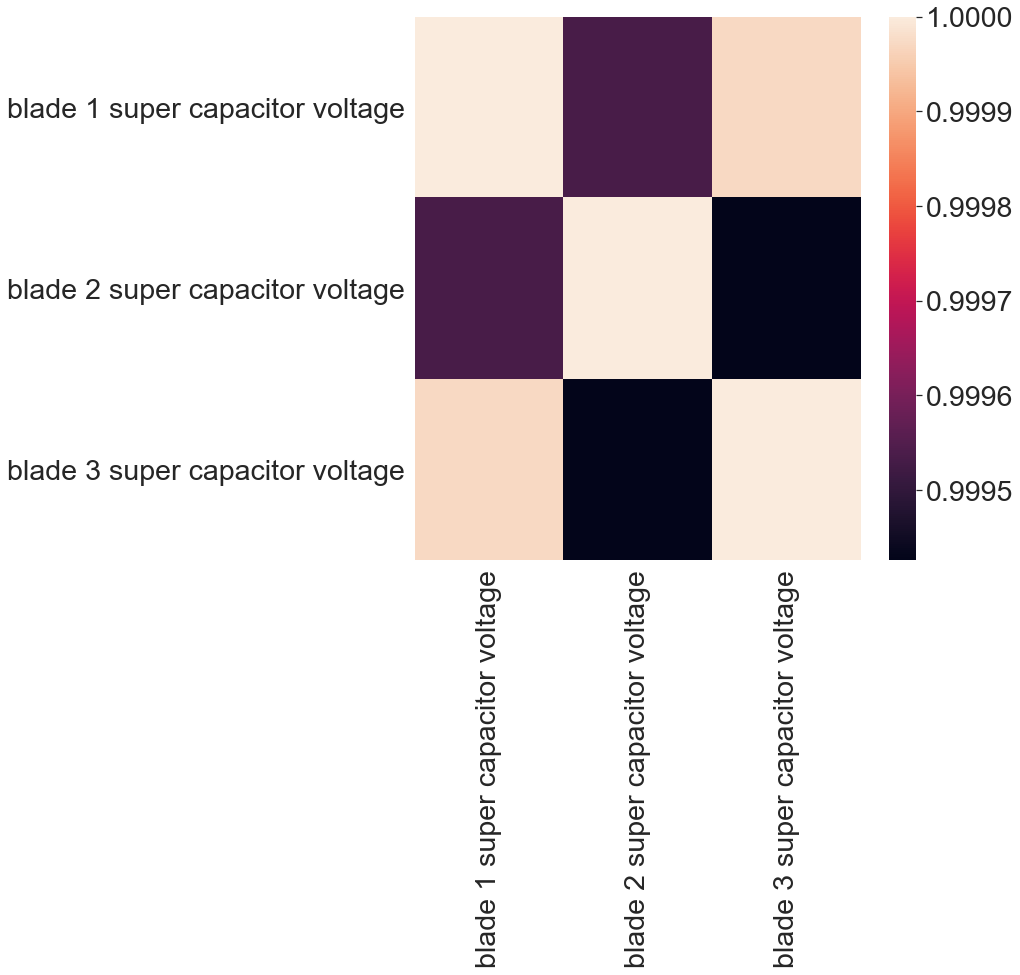

In [32]:
#Feature 'blade 1,2,3 super capacitor voltage':
df_selected = df[['blade 1 super capacitor voltage', 'blade 2 super capacitor voltage', 'blade 3 super capacitor voltage']]
plot_correlation_matrix(df_selected)

Die Variablen sind alle stark korreliert. Es können zwei davon entfernt werden

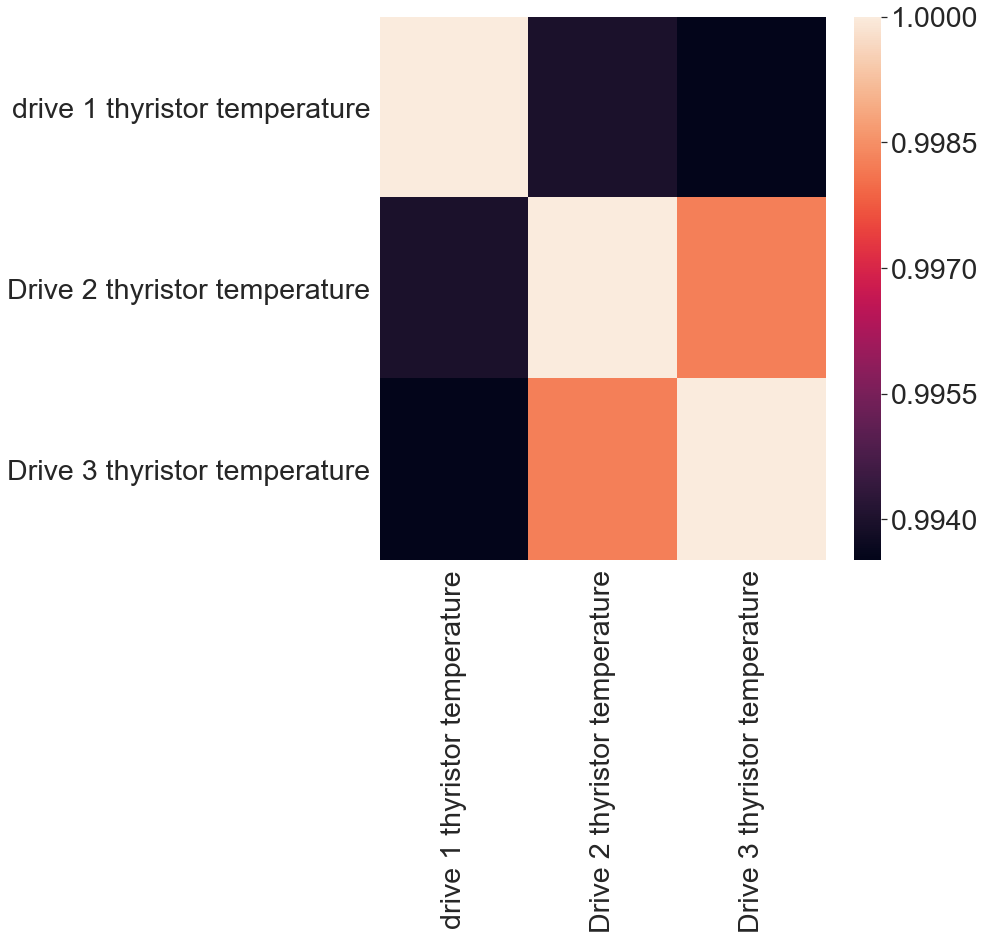

In [14]:
#Feature 'drive 1,2,3 thyristor temperature':
df_selected = pp.remove_outliers(df[['drive 1 thyristor temperature', 'Drive 2 thyristor temperature', 'Drive 3 thyristor temperature']]) # WE remove outliers, because a previous analysis showed that 'Drive 2 thyristor temperature' is strongly affected. Otherwise the correlation between 'Drive 1,3 thyristor temperature' and 'Drive 2 thyristor temperature' would be 0.
plot_correlation_matrix(df_selected)

Die Variablen 'drive 1 thyristor temperature', 'Drive 2 thyristor temperature' und 'Drive 3 thyristor temperature' sind stark miteinander korreliert, sodass zwei der Variablen entfernt werden können.

## Zusammenfassung der Korrelationsanalyse
Diese Analyse zeigt uns, dass manche Variablen stark voneinander abhängen. Teilweise kann man auch davon ausgehen, dass es sich bei den Messwerten um Werte von redundanten Sensoren handelt. Die stark korrelierten werte werden wir für die folgenden Klassifizierungsaufgaben daher aus dem Datensatz entfernen bzw. zusammenführen.
Folgende Änderungen sind bezüglich der Korrelationsanalyse möglich:
- 'blade 1,2,3 angle' --> 'blade angle'
- 'pitch motor 1 current', 'pitch motor 2 current','Pitch motor 3 current' --> 'pitch motor current'
- 'generator stator temperature 1-6' --> 'generator stator temperature'
- 'Pitch motor 1,2,3 power estimation' --> 'Pitch motor power estimation'
- 'blade 1,2,3 battery box temperature' --> 'blade 1 battery box temperature', 'blade 2 3 battery box temperature'
- 'vane 1 pitch motor temperature', 'blade 2,3 pitch motor temperature' --> 'vane 1 pitch motor temperature', 'blade 2 3 pitch motor temperature'
- 'blade 1,2,3 inverter box temperature' --> 'blade 1 2 inverter box temperature', 'blade 3 inverter box temperature'
- 'blade 1,2,3 super capacitor voltage' --> 'blade super capacitor voltage'
- 'drive 1,2,3 thyristor temperature' --> 'drive thyristor temperature'

# Ergebnisse der Korrelationsanalyse
##### Neue Variablen (Median Werte der mehrfach vorkommenden Variablen):
'blade angle', 'pitch motor current', 'generator stator temperature', 'Pitch motor power estimation', 'blade 2 3 battery box temperature', 'blade 2 3 pitch motor temperature', 'blade 1 2 inverter box temperature', 'blade super capacitor voltage', 'drive thyristor temperature'

##### Variablen die entfernt werden können:
'blade 1 angle', 'blade 2 angle', 'blade 3 angle', 'pitch motor 1 current', 'pitch motor 2 current', 'Pitch motor 3 current', 'generator stator temperature 1', 'generator stator temperature 2', 'generator stator temperature 3', 'generator stator temperature 4', 'Generator stator temperature 5', 'generator stator temperature 6', 'Pitch motor 1 power estimation', 'Pitch motor 2 power estimation', 'Pitch motor 3 power estimation', 'blade 2 battery box temperature', 'blade 3 battery box temperature', 'blade 2 pitch motor temperature', 'blade 3 pitch motor temperature', 'blade 1 inverter box temperature', 'blade 2 inverter box temperature', 'blade 1 super capacitor voltage', 'blade 2 super capacitor voltage', 'blade 3 super capacitor voltage', 'drive 1 thyristor temperature', 'drive 2 thyristor temperature', 'drive 3 thyristor temperature'

# ------------- Scatter Plots -----------------

Nun untersuchen wir die Variablen der train Daten auf deren Fähigkeit zur Vorhersage eines Ausfalls. Wir betrachten dazu zunächst erneut einige Grafiken in denen jeweils eine Variable gegen eine andere Variable geplottet wird. Generell kann man davon ausgehen, dass eine Variable geeignet ist, wenn sich entsprechend dem Fehlerlabel zwei eindeutig unterscheidbare Cluster bilden.

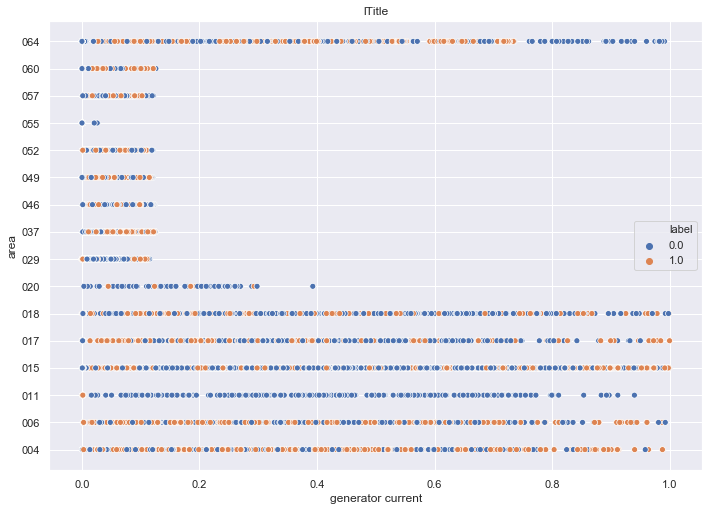

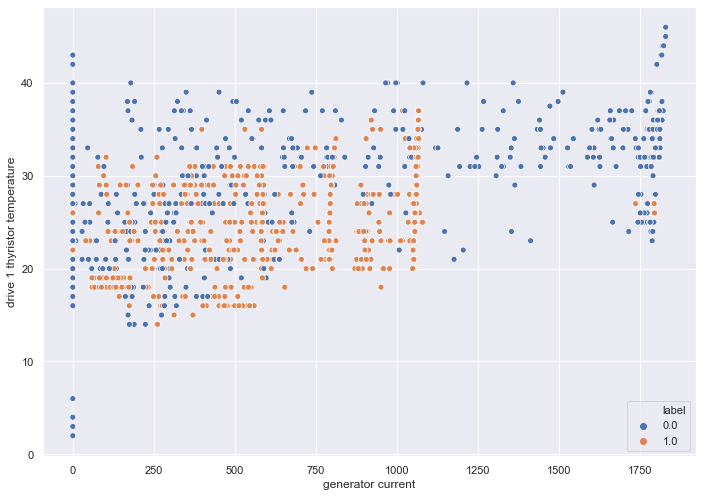

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Plot with all areas
plot = sns.scatterplot(data=df_preprocessed, x="generator current", y="area", hue="label").set_title('lTitle')
plt.show()
# Plot with specific area
plot = sns.scatterplot(data=df_area, x="generator current", y="drive 1 thyristor temperature", hue="label")
plt.show()

Dieser Plot zeigt, das für das Gebiet 064 ein niedriger generator current Wert auf einen Ausfall des Windrads hindeutet. Für die anderen Gebiete kann dies nicht mit Sicherheit gesagt werden.

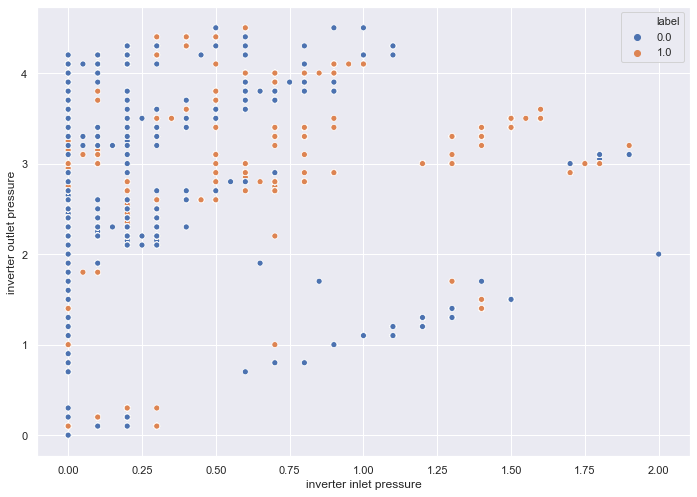

In [37]:
# Plot
plot = sns.scatterplot(data=df, x="inverter inlet pressure", y="inverter outlet pressure", hue="label")
plt.show()

Ein höherer inverter inlet pressure Wert scheint auf Ausfälle hinzudeuten.

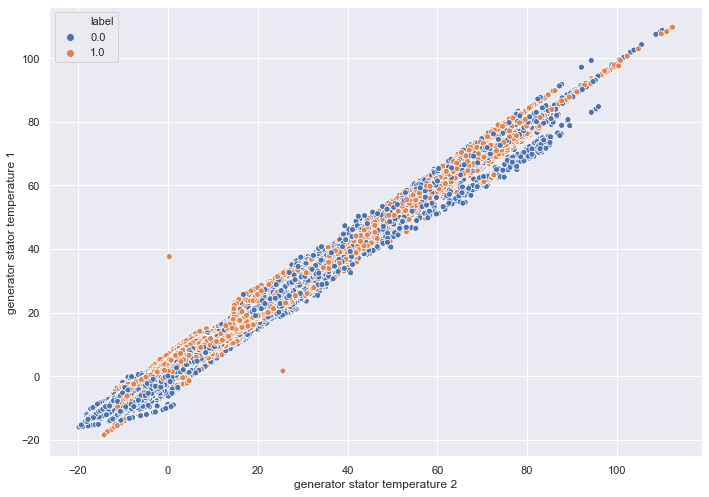

In [38]:
plot = sns.scatterplot(data=df, x="generator stator temperature 2", y="generator stator temperature 1", hue="label")
plt.show()

Wenn man die Werte generator stator temperature 1 und 2 vergleicht, so sieht man deutlich die Korrelation. Auch lässt sich hier erkennen, dass dieser Wert nicht eindeutig für eine Klassifizierung verwendet werden kann.

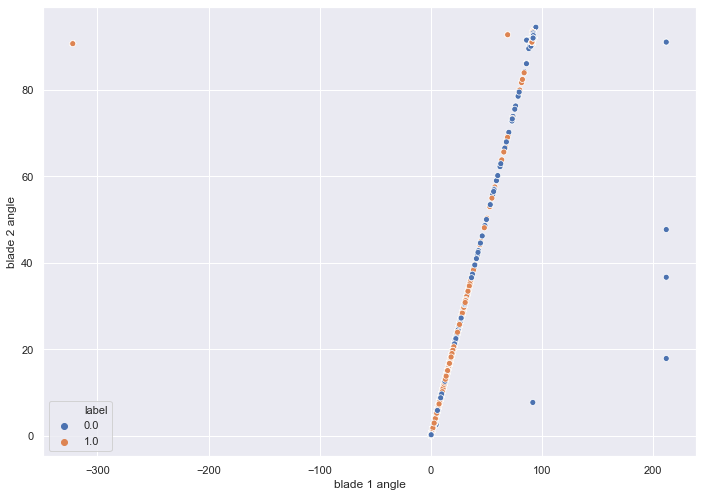

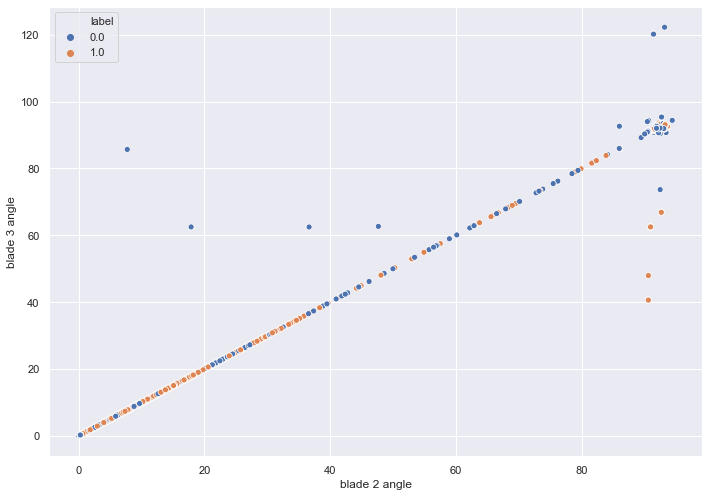

In [39]:
plot = sns.scatterplot(data=df, x="blade 1 angle", y="blade 2 angle", hue="label")
plt.show()
plot = sns.scatterplot(data=df, x="blade 2 angle", y="blade 3 angle", hue="label")
plt.show()

Im Allgemeinen kann man hier davon ausgehen, dass ein Windrad eher einen Defekt bekommt, wenn der blade angle niedrig ist.

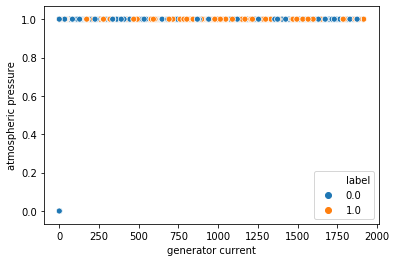

In [8]:
plot = sns.scatterplot(data=df, x="generator current", y="atmospheric pressure", hue="label")
plt.show()